In [1]:

import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout

num_classes = 10
im_rows = 32
im_cols = 32
im_size = im_rows * im_cols * 3

# データを読み込む --- (*1)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# データを一次元配列に変換 --- (*2)
X_train = X_train.reshape(-1, im_size).astype('float32') / 255
X_test = X_test.reshape(-1, im_size).astype('float32') / 255
# ラベルデータをOne-Hot形式に変換
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# モデルを定義 --- (*3)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(im_size,)))
model.add(Dense(num_classes, activation='softmax'))

# モデルをコンパイル --- (*4)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 学習を実行 --- (*5)
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=50,
    verbose=1,
    validation_data=(X_test, y_test))

# モデルを評価 --- (*6)
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8815 - accuracy: 0.3290 - val_loss: 1.7180 - val_accuracy: 0.3863
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6899 - accuracy: 0.3949 - val_loss: 1.6613 - val_accuracy: 0.3978
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6247 - accuracy: 0.4220 - val_loss: 1.6449 - val_accuracy: 0.3993
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5884 - accuracy: 0.4326 - val_loss: 1.6192 - val_accuracy: 0.4160
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5634 - accuracy: 0.4425 - val_loss: 1.5497 - val_accuracy: 0.4475
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5399 - accuracy: 0.4504 - val_loss: 1.5523 - val_accuracy: 0.4452
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5230 - accuracy: 0.4573 - val_loss: 1.5139 - val_accuracy:

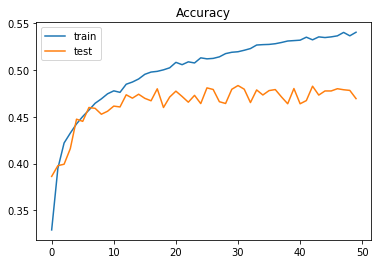

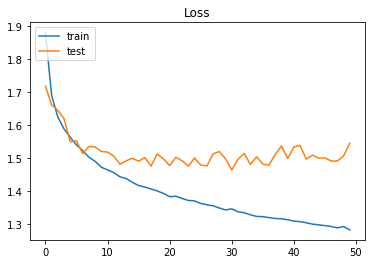

In [2]:
# 学習の様子をグラフへ描画 --- (*7)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [3]:
model.save_weights('cifar10_mlp_weight.h5')

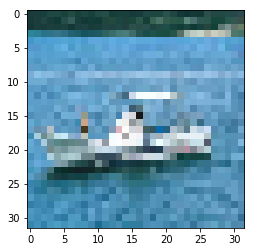

1/1 [==============================] - 0s 924us/step
airplane = 33
automobile = 0
bird = 20
cat = 1
deer = 1
dog = 0
frog = 0
horse = 0
ship = 41
truck = 0
---
予測した結果= ship


In [6]:
#python.pyでcifar10_mlp.pyを実行した方はここからスタート
import cv2
import numpy as np
# ラベル情報
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# モデルデータを読み込み
model.load_weights('cifar10_mlp_weight.h5')

# OpenCVを使って画像を読み込む
im = cv2.imread('ship.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (32, 32))
plt.imshow(im) # 画像を出力
plt.show()

# MLPで学習した画像データに合わせる
im = im.reshape(im_size).astype('float32') / 255
# 予測する
r = model.predict(np.array([im]), batch_size=32,verbose=1)
res = r[0]
# 結果を表示する
for i, acc in enumerate(res):
    print(labels[i], "=", int(acc * 100))
print("---")
print("予測した結果=", labels[res.argmax()])